---
title:  "혼자하는 Text분석_04"
excerpt: "Sckit-lean library 과 Keras를 사용한 Text 분석 비교"

categories:
  - Machine-Learning
tags:
  - Keras
  - text anlysis
  - 머신러닝
  - keras tokenizer
last_modified_at: 2020-03-26T16:13:00-05:00
---

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## 단어와 문자의 원-핫 인코딩
원-핫 인코딩은 토큰을 벡터로 변환하는 가장 일반적이고 기본적인 방법입니다. 3장에서 IMDB와 로이터 예제에서 이를 보았습니다(단어의 원-핫 인코딩을 사용했습니다). 모든 단어에 고유한 정수 인덱스를 부여하고 이 정수 인덱스 i를 크기가 N(어휘 사전의 크기)인 이진 벡터로 변환합니다. 이 벡터는 i번째 원소만 1이고 나머지는 모두 0입니다.

물론 원-핫 인코딩은 문자 수준에서도 적용할 수 있습니다. 원-핫 인코딩이 무엇이고 어떻게 구현하는지 명확하게 설명하기 위해 단어와 문자에 대한 간단한 예를 만들었습니다.

__단어 수준의 원-핫 인코딩__

In [2]:
import numpy as np

# 초기 데이터: 각 원소가 샘플입니다
# (이 예에서 하나의 샘플이 하나의 문장입니다. 하지만 문서 전체가 될 수도 있습니다)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 데이터에 있는 모든 토큰의 인덱스를 구축합니다 = 어휘사전 구축 과정이라고 보면된다.
token_index = {}
for sample in samples:
    # split() 메서드를 사용해 샘플을 토큰으로 나눕니다.
    # 실전에서는 구둣점과 특수 문자도 사용합니다.
    for word in sample.split():
        if word not in token_index:
            # 단어마다 고유한 인덱스를 할당합니다.
            token_index[word] = len(token_index) + 1
            # 인덱스 0은 사용하지 않습니다.

In [3]:
## 상기코드로 구추한 어휘사전
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [4]:
# 샘플을 벡터로 변환합니다.
# 각 샘플에서 max_length 까지 단어만 사용합니다.
max_length = 10

In [5]:
list(enumerate(sample.split()))[:max_length] ## [:max_length] 는 어짜피 10 보다 짧은 시퀀스로 이루어진 문자이니 상관없다. 

[(0, 'The'), (1, 'dog'), (2, 'ate'), (3, 'my'), (4, 'homework.')]

In [6]:
# 결과를 저장할 배열입니다
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [7]:
print(results.shape)

(2, 10, 11)


In [8]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

위의 예에서, results[i, j, index] 의 의미를 좀 더 살펴보면,  
- i : 샘플수 여기서는 2개
- j : 샘플의 Max 시퀀스 수. 여기서는 max_length = 10 로 미리 define 했다.
- index : 미리 tokenizer 해서, 쪼개놓은 어휘사전의 단어별 index 이다.

**문자 수준 원-핫 인코딩**

In [9]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # 출력 가능한 모든 아스키(ASCII) 문자

In [10]:
characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [11]:
token_index = dict(zip(characters, range(1, len(characters) + 1))) ## 어휘사전만들기

n = 0
for key,val in token_index.items():
    if (20 < n) & (n < 30) :
        print(key,val)
    n += 1       

l 22
m 23
n 24
o 25
p 26
q 27
r 28
s 29
t 30


In [12]:
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [13]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## Keras 의 Tokenizer

케라스에는 원본 텍스트 데이터를 단어 또는 문자 수준의 원-핫 인코딩으로 변환해주는 유틸리티가 있습니다. **특수 문자를 제거**하거나 **빈도가 높은 N개의 단어만을 선택**(입력 벡터 공간이 너무 커지지 않도록 하기 위한 일반적인 제한 방법입니다)하는 등 여러 가지 중요한 기능들이 있기 때문에 이 유틸리티를 사용하는 것이 좋습니다.

케라스를 사용한 단어 수준의 원-핫 인코딩:

In [14]:
from keras.preprocessing.text import Tokenizer
import sys
np.set_printoptions(threshold=sys.maxsize)

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
## 이렇게 되면, 원-핫 인코딩시, 단어수가 1000 개가 되든 안되든, n* 1000 규모가 되고, 해당하지 않는 단어들은 모두 0으로 되어서, 낭비가 많다.
tokenizer = Tokenizer(num_words=1000)

# 단어 인덱스를 구축합니다.
tokenizer.fit_on_texts(samples)

# 문자열을 정수 인덱스의 리스트로 변환합니다.
sequences = tokenizer.texts_to_sequences(samples)

In [15]:
## sequences 는 이렇게 숫자형으로 어휘사전이 만들어졌구나...이정도로만 활용하는 것이다.
## 한번에 texts_to_matrix 하면, 한번에 one-hot 으로 나올수 있다.
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [16]:
# 직접 원-핫 이진 벡터 표현을 얻을 수 있습니다.
# 원-핫 인코딩 외에 다른 벡터화 방법들도 제공합니다!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='count') ## count , binary
print(one_hot_results.shape) ## 위에서, max_size = 1000 으로 해서 그렇다.

(2, 1000)


In [17]:
tokenizer_02 = Tokenizer(num_words=10)
# 단어 인덱스를 구축합니다.
tokenizer_02.fit_on_texts(samples)

one_hot_results_02 = tokenizer_02.texts_to_matrix(samples, mode='binary') ## count , binary
print(one_hot_results_02.shape) ## 결과가 확연히 다르다.
one_hot_results_02

(2, 10)


array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1., 1.]])

주의해야 할점은 수동으로 원핫잍코딩을 했을때의 결과와 다르다는 점이다.  
수동으로 했을때는 3dim(2, 10, 1000) 이고, 지금은 (2,10) 으로 return 된다는 점이다.  
특별한 의미가 있지는 않다.  
기존 library 를 활용하면,  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfVectorizer  
이 2개처럼, 결과가 나온다.

In [18]:
# 계산된 단어 인덱스를 구합니다.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


원-핫 인코딩의 변종 중 하나는 원-핫 해싱 기법입니다. 이 방식은 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용합니다. 각 단어에 명시적으로 인덱스를 할당하고 이 인덱스를 딕셔너리에 저장하는 대신에 단어를 해싱하여 고정된 크기의 벡터로 변환합니다. 일반적으로 간단한 해싱 함수를 사용합니다. 이 방식의 주요 장점은 명시적인 단어 인덱스가 필요 없기 때문에 메모리를 절약하고 온라인 방식으로 데이터를 인코딩할 수 있습니다(전체 데이터를 확인하지 않고 토큰을 생성할 수 있습니다). 한 가지 단점은 해시 충돌입니다. 두 개의 단어가 같은 해시를 만들면 이를 바라보는 머신 러닝 모델은 단어 사이의 차이를 인식하지 못합니다. 해싱 공간의 차원이 해싱될 고유 토큰의 전체 개수보다 훨씬 크면 해시 충돌의 가능성은 감소합니다.

**해싱 기법을 사용한 단어 수준의 원-핫 인코딩**

In [19]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1,000인 벡터로 저장합니다.
# 1,000개(또는 그이상)의 단어가 있다면 해싱 충돌이 늘어나고 인코딩의 정확도가 감소될 것입니다
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환합니다.
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [20]:
results.shape

(2, 10, 1000)

해싱기법은 잘 사용하지 않는다.

## 본격적으로 하는 단어 Embedding 사용하기

**Embedding 개념**  
- 텍스트 분석에서는 결국 정수형 값으로 index 화 해서, 사용할수밖에 없는데 '희소행렬' 이든, '원핫인코딩' 이든, 결국 고차원을 가지게 된다.  
  그리고, 이렇게 표현되는 값들은 단어별의 연관성, 방향성을 설명할 수 없는 구조가 된다. 이를 보완하기 위해 단어 -> 벡터 로 변환시키는 이를 수행하는 layer 가 Embedding layer 곧 Embedding! 
- 단어를 벡터로 변환 표현된 공간에 표현하면, 하기 그림과 같이 된다. 이 공간 안에서는 벡터의 방향(화살표)에 따라서, 단어의 의미가 구분지어지고  
  비슷한 의미의 단어는 가까운 거리 L2 거리에 있게 된다. <단어 Embedding 은 언어를 기하학적 공간에 매핑하는 것이다.>  
- Embedding 층은 (특정 단어를 나타내는) 정수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해하면 된다.

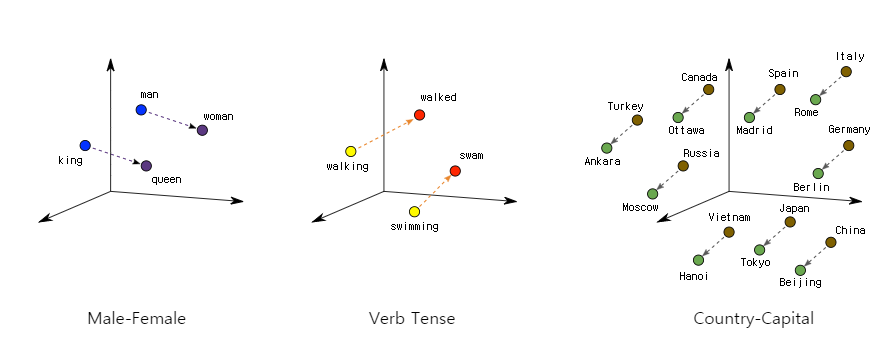

Embedding 에 대한 설명을 유트브로 정리해 둔 곳을 소개하면,  
허민석 youtube 인데, 필자는 여기서 많은 도움을 받았고, 자주 구독하면서 보는 곳이다.  
하기 화면도 해당 유튜브에서 가져온 것임을 밝힌다.
[허민석의 Youtube](https://www.youtube.com/watch?v=sY4YyacSsLc&list=PLVNY1HnUlO24lnGmxdwTgfXkd4qhDbEkG&index=14)

하기 화면에 등장한 예제는 다음 Post 에서 한번 다루어볼 생각이다.

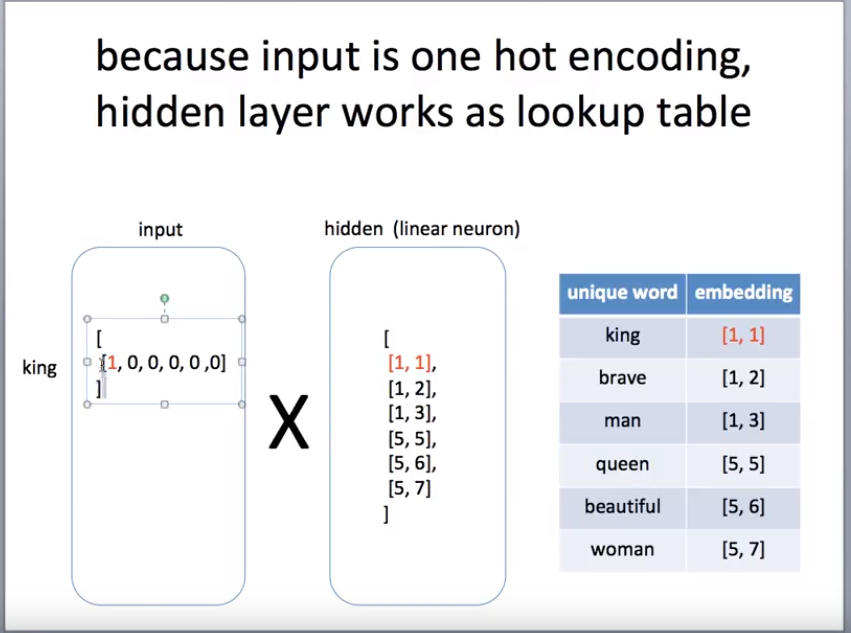

keras 에는 Embedding layer 를 가지고 있고 이 layer 를 통과하면, Embedding 층에서 설정한 차원(dim)를 가지게 된다.  
물론 상기 그림의 예제와는 다르지만, Embedding 층을 통과하고, input 값과 결과값이 어떻게 보이는지 직접확인해보자

- **Embedding 층 입력** : 크기가 (samples, sequence_length)인 2D 정수 텐서를 입력으로 받음. 각 샘플은 정수의 시퀀스이며 **가변 길이의 시퀀스를 임베딩**할 수 있다.   

```embedding_layer = Embedding(1000, 64)```  

위 Embedding 층(1000,64 로 생성)에 (32, 10) 크기의 배치(길이가 10인 시퀀스 32개로 이루어진 배치)나 (64, 15) 크기의 배치(길이가 15인 시퀀스 64개로 이루어진 배치)를 주입할 수 있다.  
배치에 있는 모든 시퀀스는 길이가 같아야 하므로(하나의 텐서에 담아야 하기 때문에) 작은 길이의 시퀀스는 0으로 패딩되고 길이가 더 긴 시퀀스는 잘립니다.

- **Embedding 층 출력** : 크기가 (samples, sequence_length, embedding_dimensionality)인 3D 실수형 텐서를 반환. 이런 3D 텐서는 RNN 층이나 1D 합성곱 층에서 처리.

In [22]:
from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 20

In [23]:
## numpy version 문제로, imdb.load 가 수행되지 않는 경우가 있다. 
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage (다시 numpy.load 를 원래데로 원복한다.)
np.load = np_load_old

In [31]:
print("x_train_ndim:{}\tx_train_shape:{}\tx_train_type:{}".format(x_train.ndim,x_train.shape,type(x_train)))
for i in range(10,20):
    print("x_train {}째 데이터 길이 {}".format(i,len(x_train[i])))

x_train_ndim:1	x_train_shape:(25000,)	x_train_type:<class 'numpy.ndarray'>
x_train 10째 데이터 길이 450
x_train 11째 데이터 길이 99
x_train 12째 데이터 길이 117
x_train 13째 데이터 길이 238
x_train 14째 데이터 길이 109
x_train 15째 데이터 길이 129
x_train 16째 데이터 길이 163
x_train 17째 데이터 길이 752
x_train 18째 데이터 길이 212
x_train 19째 데이터 길이 177


In [32]:
# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train_a = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_a = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [33]:
print("x_train_a_ndim:{}\tx_train_a_shape:{}\tx_train_a_type:{}".format(x_train_a.ndim,x_train_a.shape,type(x_train_a)))
for i in range(10,20):
    print("x_train_a {}째 데이터 길이 {}".format(i,len(x_train_a[i])))

x_train_a_ndim:2	x_train_a_shape:(25000, 20)	x_train_a_type:<class 'numpy.ndarray'>
x_train_a 10째 데이터 길이 20
x_train_a 11째 데이터 길이 20
x_train_a 12째 데이터 길이 20
x_train_a 13째 데이터 길이 20
x_train_a 14째 데이터 길이 20
x_train_a 15째 데이터 길이 20
x_train_a 16째 데이터 길이 20
x_train_a 17째 데이터 길이 20
x_train_a 18째 데이터 길이 20
x_train_a 19째 데이터 길이 20


In [35]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=maxlen)) # Embedding 층의 가중치 크기 : 10000*8  
# 10000:가능한 토큰의 갯수 / 8 : embedding_dimensionality 임베딩 차원
# Embedding input : (samples, sequence_length)
# Embedding output : (samples, sequence_length, embedding_dimensionality) 여기서는 (samples, maxlen, 8)가 됩니다.

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


**Embedding(10000, 8, input_length=maxlen)** 이란 것은 실제 input 에 들어가는 sequence_length (여기선 20) 과 관계없이, Embedding 공간을 10000 * 8 로 만든다는 의미이다.  
당연히 현재 sample 들은 max_length 가 20 이니, 해당되는 20 을 제외한 차원은 모두 0 으로 패딩될 것 이다. -- 내 생각

In [38]:
history = model.fit(x_train_a, y_train,epochs=10,batch_size=32,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 162us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 64us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 1s 62us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 1s 62us/step - loss: 0

In [79]:
embedding_layer = model.layers[0]
print(embedding_layer)

print(embedding_layer.weights)

[<tf.Variable 'embedding_3/embeddings:0' shape=(10000, 8) dtype=float32_ref>]


#### x_train_a[11] 이 임베딩 공간을 거쳤을때, 어떻게 변환될까?

In [81]:
x_train_a[11]

array([  31,  155,   36,  100,  763,  379,   20,  103,  351, 5308,   13,
        202,   12, 2241,    5,    6,  320,   46,    7,  457])

In [82]:
print(x_train_a[11].shape , x_train_a.shape)
input_array = x_train_a[11].reshape(-1,20)
print(input_array.shape,type(input_array))

(20,) (25000, 20)
(1, 20) <class 'numpy.ndarray'>


In [83]:
embed_test = Sequential()
embed_test.add(embedding_layer)
# embed_test.compile('rmsprop', 'mse')

In [84]:
output_array = embed_test.predict(input_array)
# output_array_origin = model.layers[0].predict(input_array)

In [90]:
assert output_array.shape == (1, 20, 8)
print(output_array.shape)
output_array[0][0]

(1, 20, 8)


array([ 0.04945616, -0.1479149 ,  0.02083736,  0.08981741,  0.14231731,
       -0.09661987, -0.09025116, -0.10607173], dtype=float32)

x_train_a[11] 에 해당하는 20개 각각의 index 값들이, 8차원의 벡터로 변환되었다. 맨 앞의 1은 배치 자리이다.